# ***Assignment Part-1 | Advance Regression | Surprise Housing | Devendra Kumar***

## **Importing the basic libraries**

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

sns.set(style="darkgrid",font_scale=1.1)

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

## **Loading the dataset**

In [3]:
house= pd.read_csv('train.csv')

In [4]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **Data understanding**

In [5]:
house.shape

(1460, 81)

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
#lets loook at the missing value percentage
round(100*house.isnull().sum()/len(house.index),2).sort_values(ascending=False)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood      0.00
LotShape          0.00
LandContour

In [9]:
#columns with morethan 45% missing value
house.columns[100*house.isnull().sum()/len(house.index)>45]

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

## **Missing value treatment**

In [10]:
# based on data dictionary na in PoolQC means 'No Pool'
house.loc[house['PoolQC'].isnull(),['PoolQC']] = 'No Pool'
# based on data dictionary na in Fence means 'No Fence'
house.loc[house['Fence'].isnull(),['Fence']] = 'No Fence'
# based on data dictionary na in MiscFeature means 'none'
house.loc[house['MiscFeature'].isnull(),['MiscFeature']] = 'none'

In [11]:
# based on data dictionary na in Alley means 'No alley access'
house.loc[house['Alley'].isnull(),['Alley']] = 'No alley access'
# based on data dictionary na in FireplaceQu means 'No Fireplace'
house.loc[house['FireplaceQu'].isnull(),['FireplaceQu']] = 'No Fireplace'

In [12]:
# based on data dictionary na in BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 means ''No Basement'
house.loc[house['BsmtQual'].isnull(),['BsmtQual']] = 'No Basement'
house.loc[house['BsmtCond'].isnull(),['BsmtCond']] = 'No Basement'
house.loc[house['BsmtExposure'].isnull(),['BsmtExposure']] = "No Basement"
house.loc[house['BsmtFinType1'].isnull(),['BsmtFinType1']] = 'No Basement'
house.loc[house['BsmtFinType2'].isnull(),['BsmtFinType2']] = 'No Basement'

In [13]:
# based on data dictionary na in MasVnrType means 'none'
house.loc[house['MasVnrType'].isnull(),['MasVnrType']] = 'none'
# based on data dictionary where MasVnrType type is 'none' area will 0
house.loc[house['MasVnrArea'].isnull(),['MasVnrArea']] = 0

In [14]:
100*house['LotFrontage'].isnull().sum()/len(house.index)
#replacing the missing values with mean
house["LotFrontage"].replace(np.nan, house["LotFrontage"].mean(),inplace=True)

In [15]:
# based on data dictionary na in GarageType,GarageFinish,GarageQual,GarageCond means 'No Garage'
house.loc[house['GarageType'].isnull(),['GarageType']] = 'No Garage'
house.loc[house['GarageFinish'].isnull(),['GarageFinish']] = 'No Garage'
house.loc[house['GarageQual'].isnull(),['GarageQual']] = 'No Garage'
house.loc[house['GarageCond'].isnull(),['GarageCond']] = 'No Garage'

In [16]:
# replacing with mode value of the column
house.loc[house['Electrical'].isnull(),['Electrical']] = "SBrkr"

In [17]:
# impute GarageYrBlt with 2019 so that while calculating age it will turn to 0
# age = 2020-2020 = 0
house.loc[house['GarageYrBlt'].isnull(),['GarageYrBlt']] = 2020

In [18]:
#lets again look if there are any columns
house.columns[100*house.isnull().sum()/len(house.index)>0]

Index([], dtype='object')

In [19]:
house.shape

(1460, 81)

In [20]:
#drop duplicates if any
house=house.drop_duplicates()
house.shape

(1460, 81)

In [21]:
house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [22]:
#lets drop the ID column as it is redundant in model builiding
house.drop(['Id'],axis=1,inplace=True)

In [23]:
import datetime

##Derived variables from the dataset
#New variable creation TotalSF i.e combination of TotalBsmtSF, 1stFlrSF, 2ndFlrSF
house['TotalSF'] = house['TotalBsmtSF'] + house['1stFlrSF'] + house['2ndFlrSF']
#house["house_age_when_sold_in_month"] = (((house["YrSold"]-1) - house["YearBuilt"])*12) + house["MoSold"]
# derive house age = current_year - year build
house["house_age"] = datetime.datetime.now().year - house["YearBuilt"]
# derive garage age = current_year - year build
house["garage_age"] = datetime.datetime.now().year - house["GarageYrBlt"]
# derive gap b/w house build and remodel = YearRemodAdd - year build
house["gap_between_build_remodel"] = house["YearRemodAdd"] - house["YearBuilt"]

In [24]:
#converting to correct datatype for some variables
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')
house['YrSold'] = house['YrSold'].astype('object')
house['MoSold'] = house['MoSold'].astype('object')

In [25]:
#dividing the variables to numeric and categorical
house_numeric=house.select_dtypes(include=['float64','int64'])
house_numeric.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,house_age,garage_age,gap_between_build_remodel
0,65.0,8450,7,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,208500,2566,17,17.0,0
1,80.0,9600,6,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,181500,2524,44,44.0,0
2,68.0,11250,7,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,223500,2706,19,19.0,1
3,60.0,9550,7,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,140000,2473,105,22.0,55
4,84.0,14260,8,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,250000,3343,20,20.0,0


In [26]:
house_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'TotalSF',
       'house_age', 'garage_age', 'gap_between_build_remodel'],
      dtype='object')

In [27]:
house_categorical=house.select_dtypes(include=['object'])
house_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [28]:
print(len(house_categorical.columns))
print(len(house_numeric.columns))

47
37


In [29]:
# correlation matrix
corr = house_numeric.corr()
corr

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,house_age,garage_age,gap_between_build_remodel
LotFrontage,1.000000,0.306795,0.234196,0.117598,0.082746,0.178699,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.024095,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.334901,0.427397,-0.117598,-0.024095,-0.075316
LotArea,0.306795,1.000000,0.105806,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.050320,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843,0.307234,-0.014228,0.050320,-0.005926
OverallQual,0.234196,0.105806,1.000000,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.385179,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982,0.668155,-0.572323,-0.385179,-0.241731
YearBuilt,0.117598,0.014228,0.572323,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.640649,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.522897,0.347133,-1.000000,-0.640649,-0.733896
YearRemodAdd,0.082746,0.013788,0.550684,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.532801,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.507101,0.342873,-0.592855,-0.532801,0.111922
MasVnrArea,0.178699,0.103321,0.407252,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.184760,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,0.472614,0.444454,-0.311600,-0.184760,-0.235602
BsmtFinSF1,0.215828,0.214103,0.239666,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.099998,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420,0.415843,-0.249503,-0.099998,-0.199531
BsmtFinSF2,0.043340,0.111170,-0.059119,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.095635,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378,0.048916,0.049107,0.095635,0.003443
BsmtUnfSF,0.122156,-0.002618,0.308159,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.160904,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479,0.373733,-0.149040,-0.160904,-0.031127
TotalBsmtSF,0.363358,0.260833,0.537808,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.230860,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581,0.826742,-0.391452,-0.230860,-0.237527


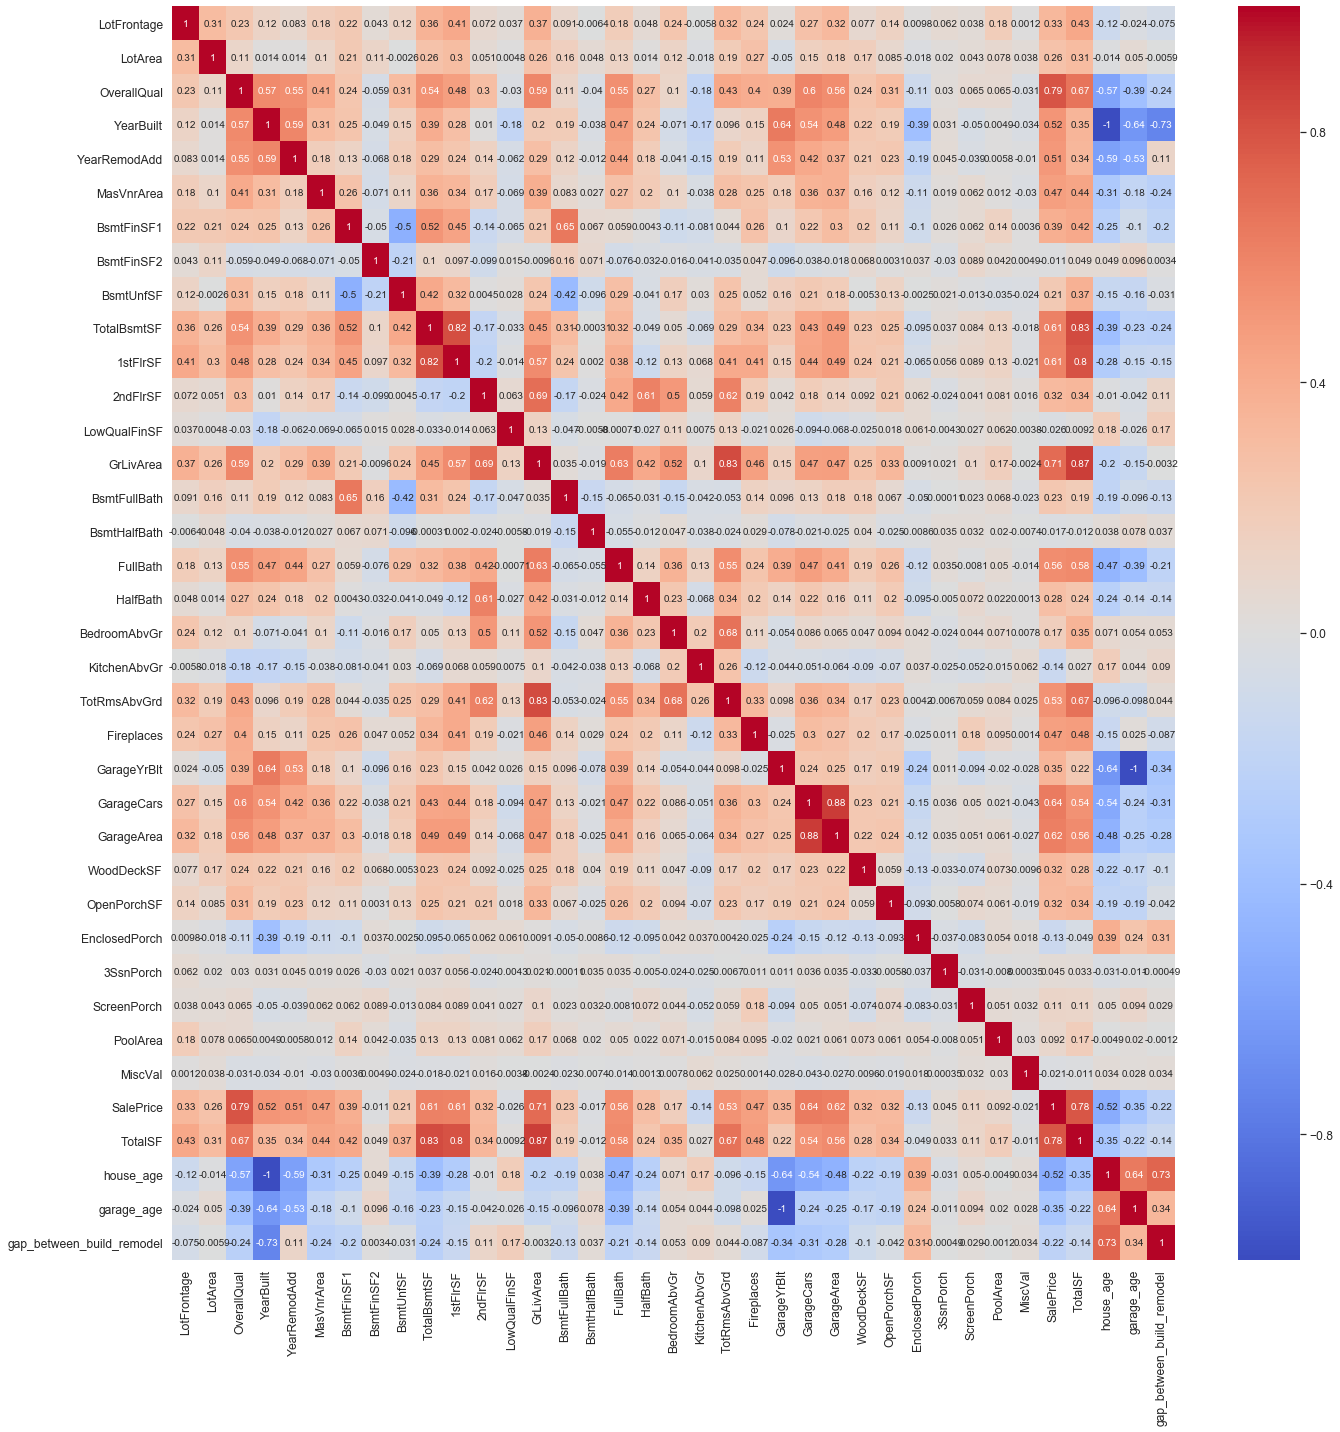

In [30]:
# plotting a heatmap
plt.figure(figsize = (20, 20))
# heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.tight_layout()
plt.show()

<Figure size 2880x2160 with 0 Axes>

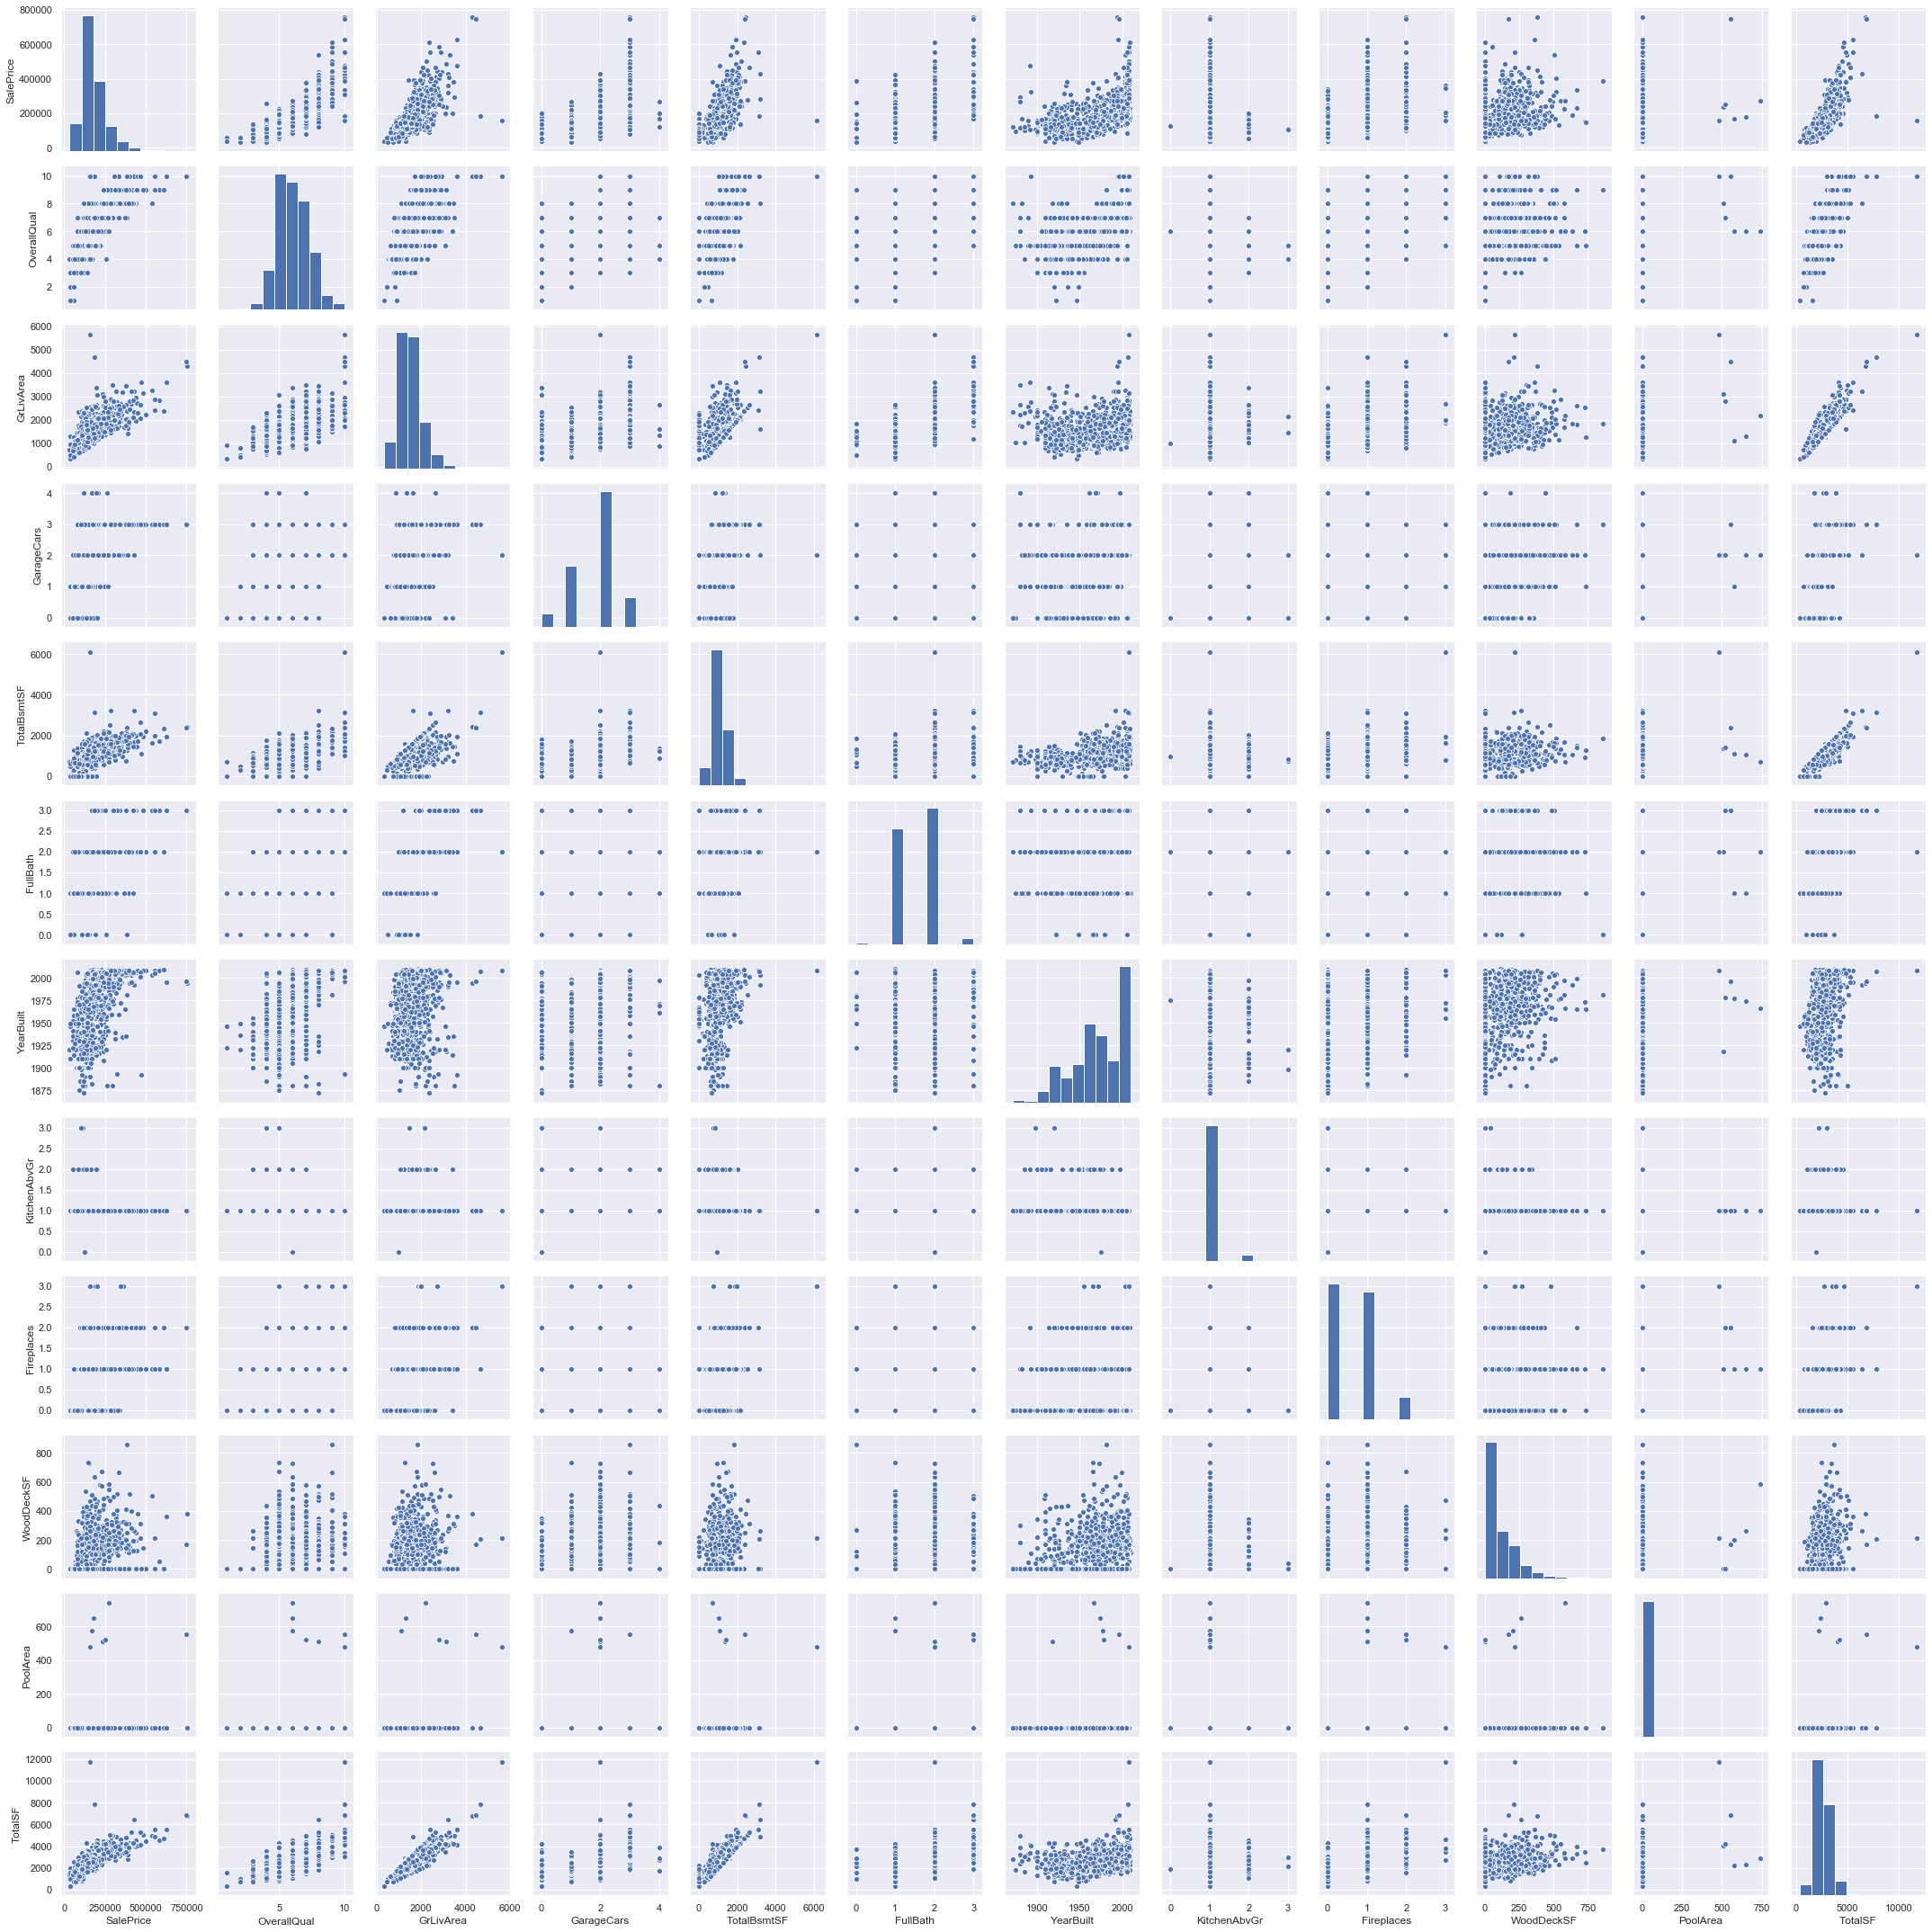

In [31]:
#plotting scatter plot for some of the numeric variables
sns.set()
plt.figure(figsize=(40, 30))
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt',
        'KitchenAbvGr','Fireplaces','WoodDeckSF','PoolArea','TotalSF']
sns.pairplot(house[cols], size = 2.5)
plt.tight_layout()
plt.show()

### **Univariate analysis**

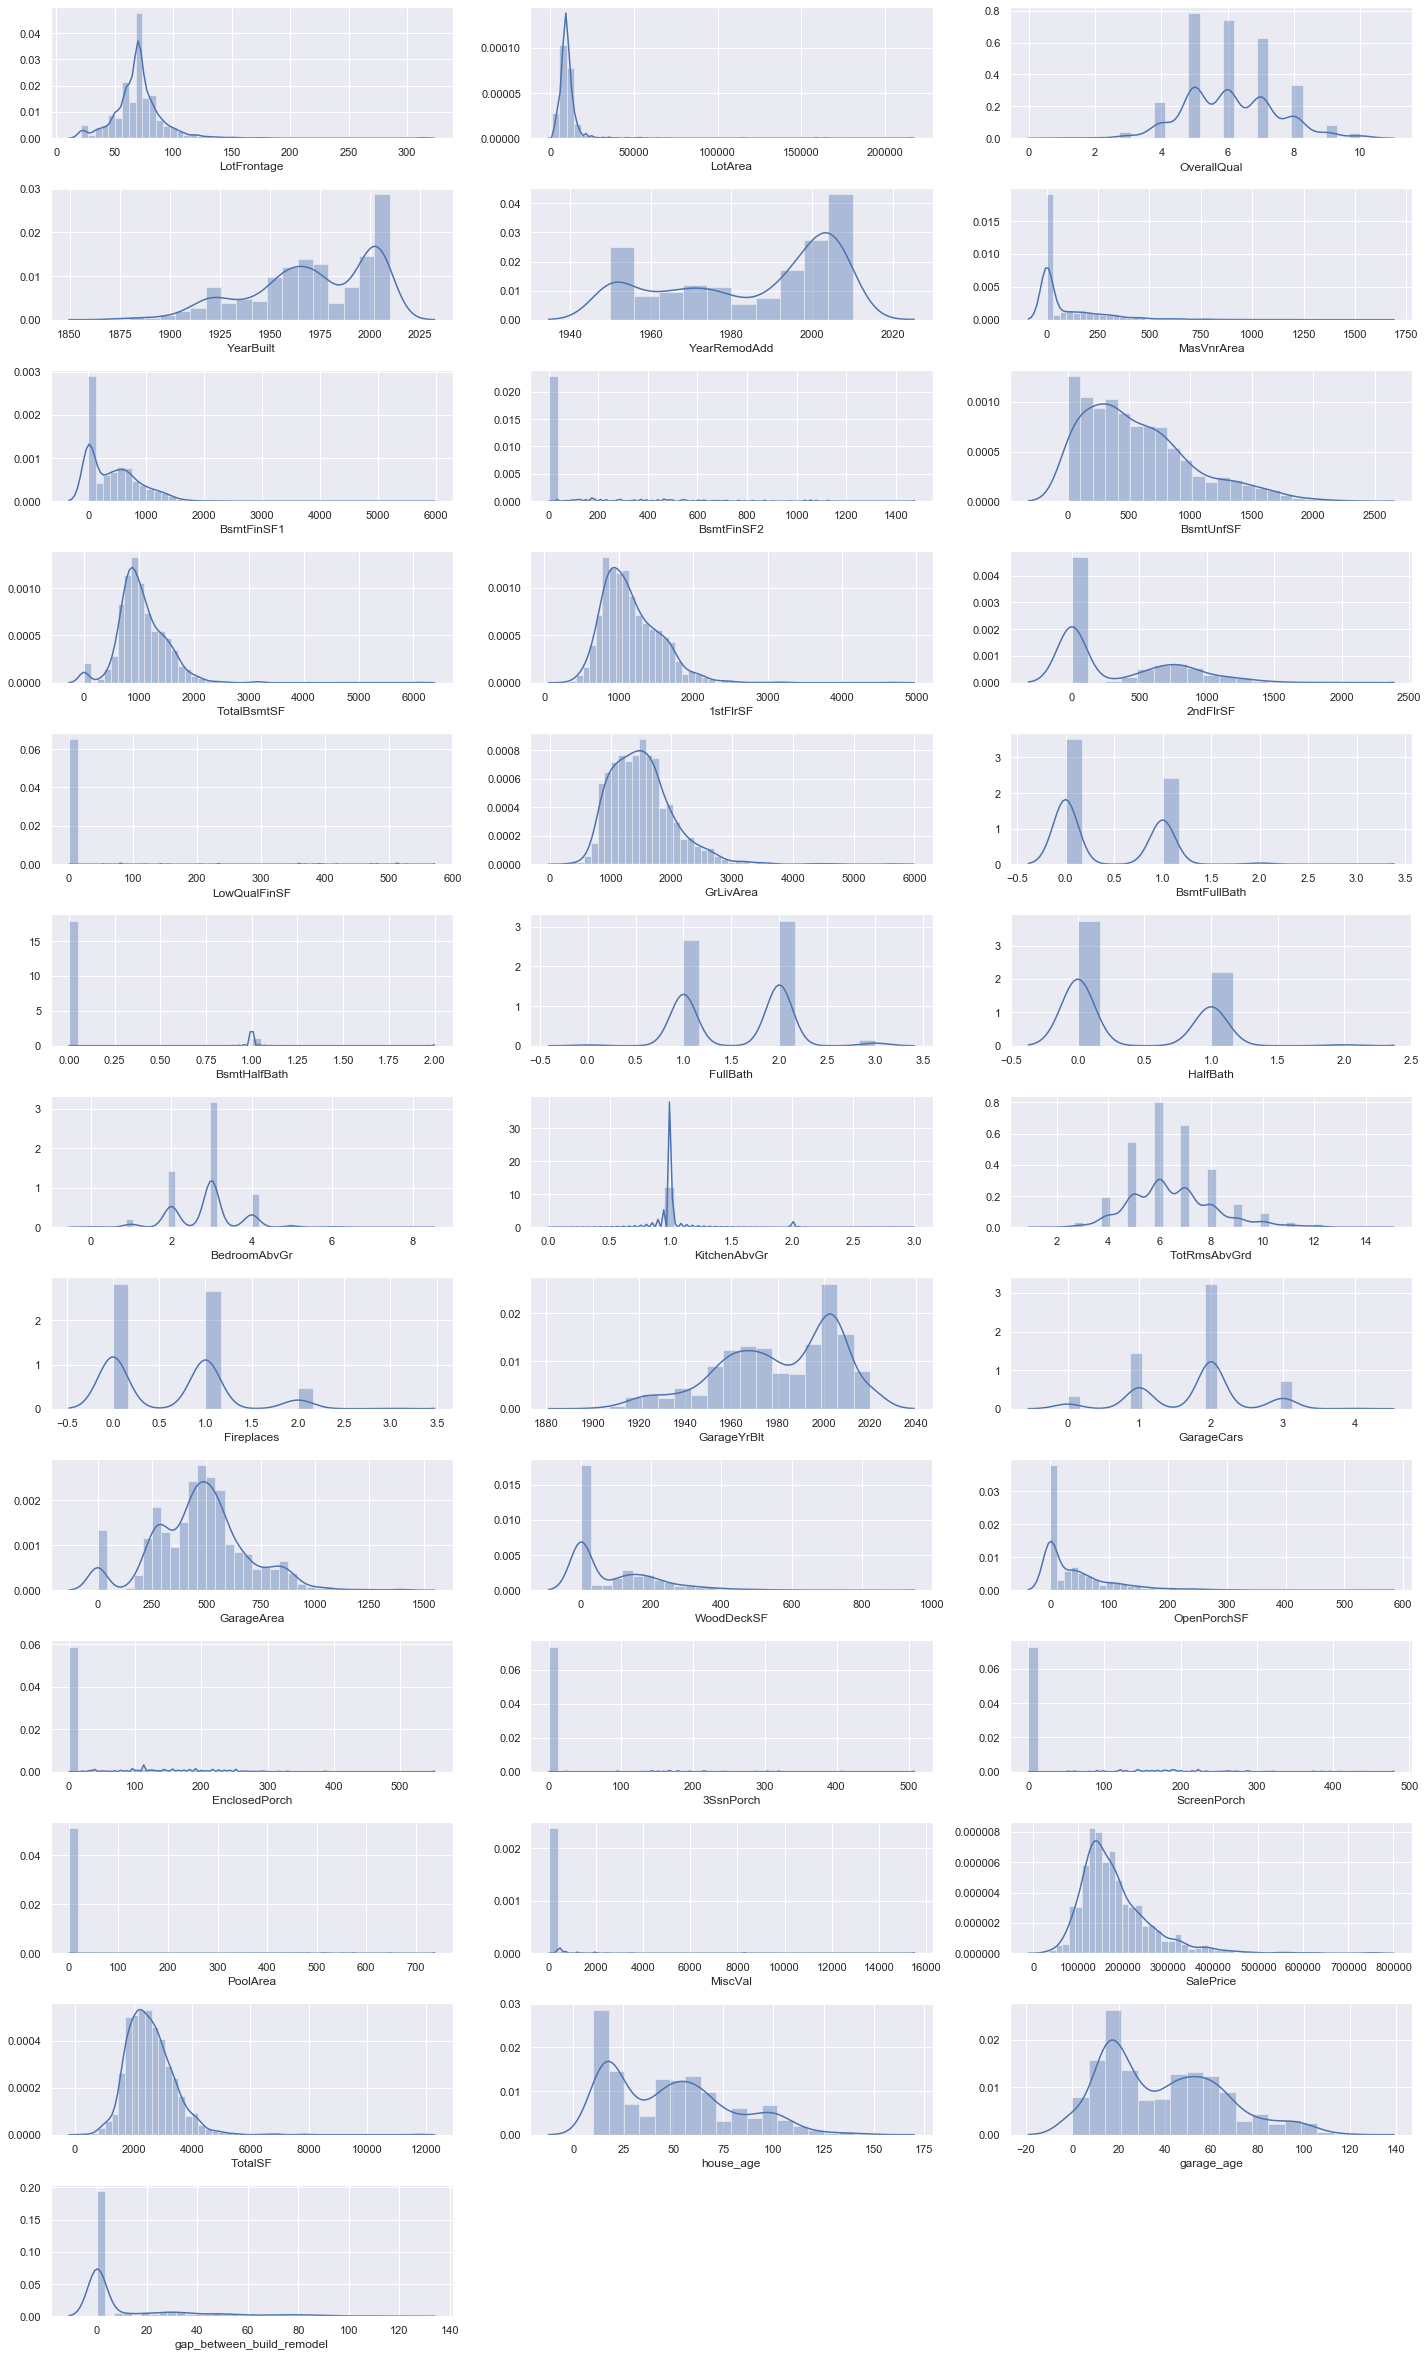

In [32]:
# Checking outliers in continous features 
# Plotting distplot to observe the distribution of the continous variables.

plt.figure(figsize=(20, 40))
for col in enumerate(house_numeric):
    plt.subplot(16,3, col[0]+1)
    sns.distplot(house[col[1]])
    plt.tight_layout()

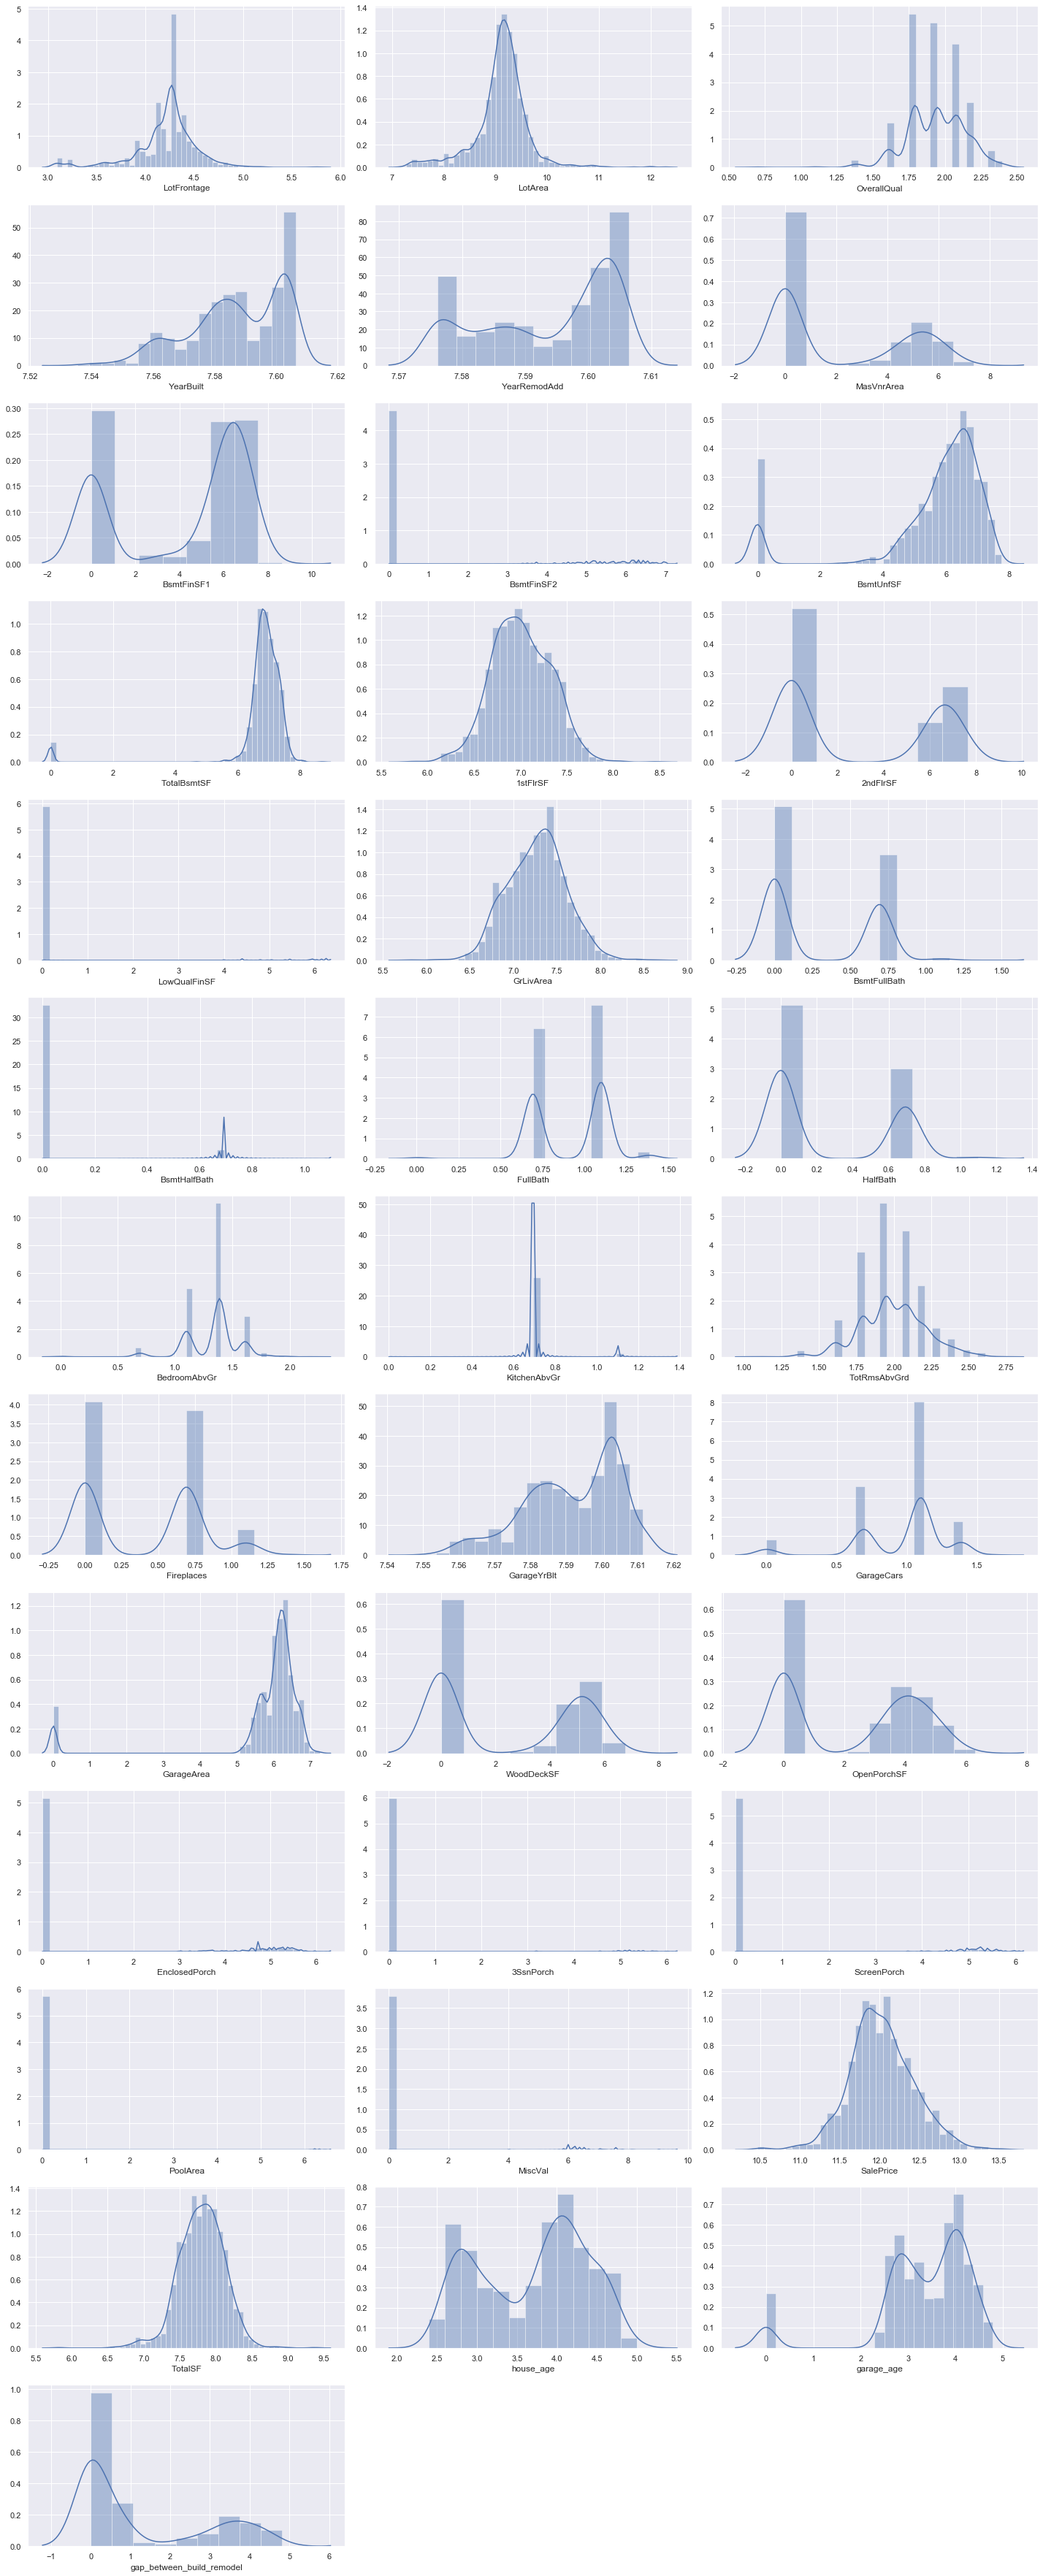

In [33]:
# Log Transformation of Continous cols

plt.figure(figsize=(20, 60))
for col in enumerate(house_numeric):
    plt.subplot(16,3, col[0]+1)
    sns.distplot(np.log(house[col[1]]+1))
    plt.tight_layout()

In [34]:
# Converting continous cols to log for gaussian distribution
for col in enumerate(house_numeric):
    house[col[1]] = np.log(house[col[1]]+1)

In [35]:
house_numeric.shape

(1460, 37)

### **Outlier Analysis**

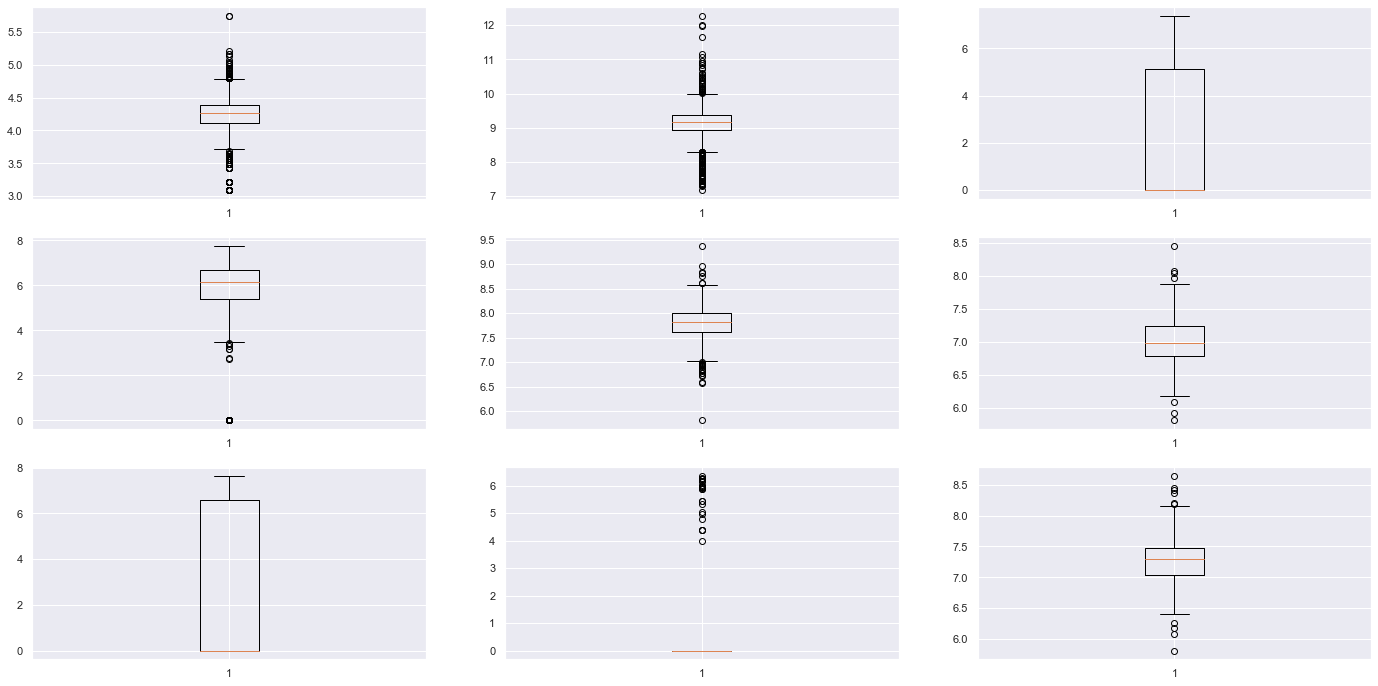

In [36]:
#boxplots for numeric varaibles
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(house.LotFrontage)
plt.subplot(3,3,2)
plt.boxplot(house.LotArea)
plt.subplot(3,3,3)
plt.boxplot(house.MasVnrArea)
plt.subplot(3,3,4)
plt.boxplot(house.BsmtUnfSF)
plt.subplot(3,3,5)
plt.boxplot(house.TotalSF)
plt.subplot(3,3,6)
plt.boxplot(house['1stFlrSF'])
plt.subplot(3,3,7)
plt.boxplot(house['2ndFlrSF'])
plt.subplot(3,3,8)
plt.boxplot(house.LowQualFinSF)
plt.subplot(3,3,9)
plt.boxplot(house.GrLivArea)
plt.show()

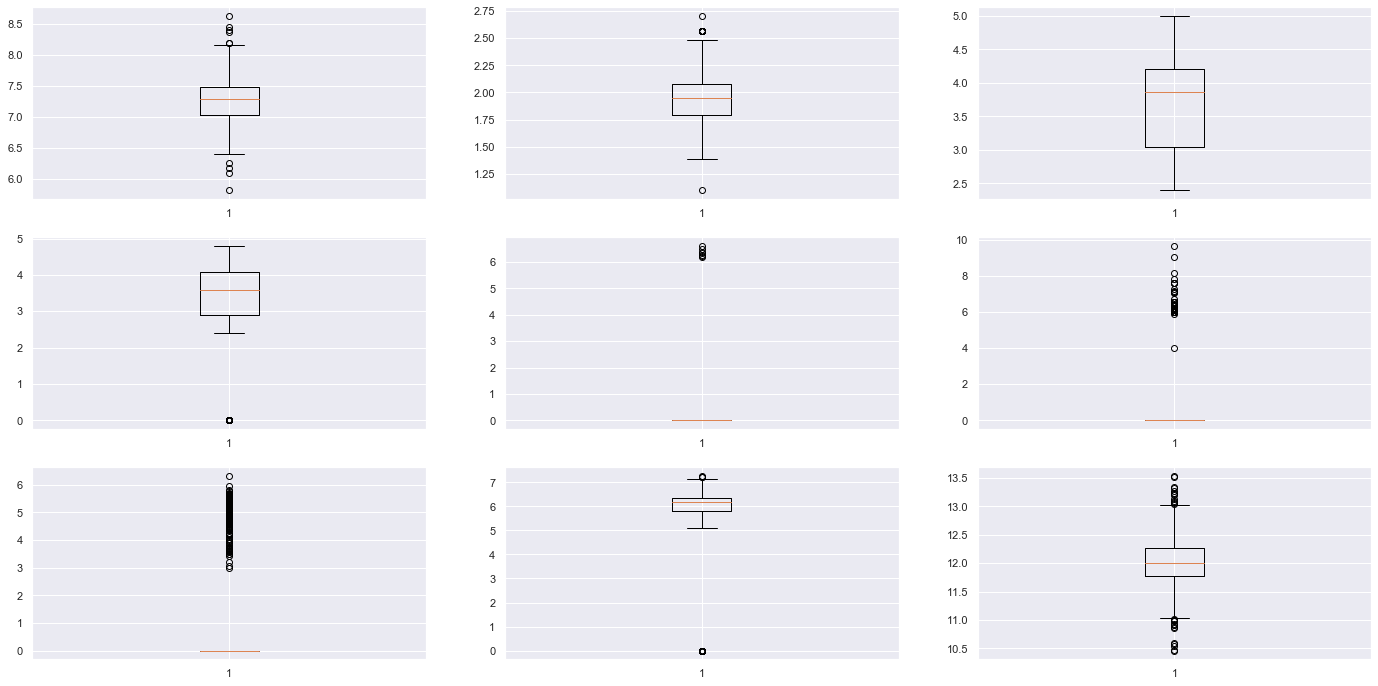

In [37]:
#boxplots for numeric variables
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(house.GrLivArea)
plt.subplot(3,3,2)
plt.boxplot(house.TotRmsAbvGrd)
plt.subplot(3,3,3)
plt.boxplot(house.house_age)
plt.subplot(3,3,4)
plt.boxplot(house.garage_age)
plt.subplot(3,3,5)
plt.boxplot(house.PoolArea)
plt.subplot(3,3,6)
plt.boxplot(house.MiscVal)
plt.subplot(3,3,7)
plt.boxplot(house.EnclosedPorch)
plt.subplot(3,3,8)
plt.boxplot(house.GarageArea)
plt.subplot(3,3,9)
plt.boxplot(house.SalePrice)
plt.show()

In [38]:
house.shape

(1460, 84)

In [39]:
# split into X and y
X = house.drop(['SalePrice'], axis=1)
y = house['SalePrice']

## **Manual Labeling**

In [40]:
# Label Encoding
print('OverallQual   :{0}'.format(house['OverallQual'].unique()))
print('OverallCond   :{0}'.format(house['OverallCond'].unique()))
print('ExterQual     :{0}'.format(house['ExterQual'].unique()))
print('KitchenQual   :{0}'.format(house['KitchenQual'].unique()))
print('FireplaceQu   :{0}'.format(house['FireplaceQu'].unique()))
print('GarageQual    :{0}'.format(house['GarageQual'].unique()))
print('PoolQC        :{0}'.format(house['PoolQC'].unique()))
print('SaleCondition :{0}'.format(house['SaleCondition'].unique()))
print('BsmtQual      :{0}'.format(house['SaleCondition'].unique()))
print('BsmtCond      :{0}'.format(house['SaleCondition'].unique()))
print('CentralAir    :{0}'.format(house['SaleCondition'].unique()))

OverallQual   :[2.07944154 1.94591015 2.19722458 1.79175947 2.30258509 1.60943791
 2.39789527 1.38629436 0.69314718 1.09861229]
OverallCond   :[5 8 6 7 4 2 3 9 1]
ExterQual     :['Gd' 'TA' 'Ex' 'Fa']
KitchenQual   :['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu   :['No Fireplace' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageQual    :['TA' 'Fa' 'Gd' 'No Garage' 'Ex' 'Po']
PoolQC        :['No Pool' 'Ex' 'Fa' 'Gd']
SaleCondition :['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
BsmtQual      :['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
BsmtCond      :['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
CentralAir    :['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


In [41]:
#replacing with binary values 

ExterQual_dict = {'Ex':4,'Gd':3,'TA':2,'Fa':1}
house['ExterQual'] = house['ExterQual'].apply(lambda x: ExterQual_dict[x])

KitchenQual_dict = {'Ex':4,'Gd':3,'TA':2,'Fa':1}
house['KitchenQual'] = house['KitchenQual'].apply(lambda x: KitchenQual_dict[x])

FireplaceQu_dict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0}
house['FireplaceQu'] = house['FireplaceQu'].apply(lambda x: FireplaceQu_dict[x])

GarageQual_dict = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0}
house['GarageQual'] = house['GarageQual'].apply(lambda x: GarageQual_dict[x])

PoolQC_dict = {'Ex':3,'Gd':2,'Fa':1,'No Pool':0}
house['PoolQC'] = house['PoolQC'].apply(lambda x: PoolQC_dict[x])


## **Label Encoding**

In [42]:
#lets include the categorical columns

house_categorical_df=X.select_dtypes(include=['object'])

In [43]:
house_categorical_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [44]:
# creating dummy variables for categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder() 

for col in house_categorical_df:
    house[col] = label_encoder.fit_transform(house[col])


In [45]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,house_age,garage_age,gap_between_build_remodel
0,5,3,4.189655,9.042040,1,1,3,3,0,4,0,5,2,2,0,5,2.079442,4,7.602900,7.602900,1,1,12,13,1,5.283204,2,4,2,2,4,3,2,6.561031,6,0.0,5.017280,6.753438,1,0,1,4,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2,2.197225,6,0.000000,0,1,7.602900,2,1.098612,6.308098,3,5,2,0.000000,4.127134,0.000000,0.0,0.0,0.0,0,4,4,0.0,1,2,8,4,12.247699,7.850493,2.890372,2.890372,0.000000
1,0,3,4.394449,9.169623,1,1,3,3,0,2,0,24,1,2,0,2,1.945910,7,7.589336,7.589336,1,1,8,8,2,0.000000,1,4,1,2,4,1,0,6.886532,6,0.0,5.652489,7.141245,1,0,1,4,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,1.098612,0.000000,1.386294,0.693147,1,1.945910,6,0.693147,3,1,7.589336,2,1.098612,6.133398,3,5,2,5.700444,0.000000,0.000000,0.0,0.0,0.0,0,4,4,0.0,4,1,8,4,12.109016,7.833996,3.806662,3.806662,0.000000
2,5,3,4.234107,9.328212,1,1,0,3,0,4,0,5,2,2,0,5,2.079442,4,7.601902,7.602401,1,1,12,13,1,5.093750,2,4,2,2,4,2,2,6.188264,6,0.0,6.075346,6.825460,1,0,1,4,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2,1.945910,6,0.693147,3,1,7.601902,2,1.098612,6.411818,3,5,2,0.000000,3.761200,0.000000,0.0,0.0,0.0,0,4,4,0.0,8,2,8,4,12.317171,7.903596,2.995732,2.995732,0.693147
3,6,3,4.110874,9.164401,1,1,0,3,0,0,0,6,2,2,0,5,2.079442,4,7.557995,7.586296,1,1,13,15,2,0.000000,1,4,0,4,1,3,0,5.379897,6,0.0,6.293419,6.629363,1,2,1,4,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,0.693147,0.000000,1.386294,0.693147,2,2.079442,6,0.693147,4,5,7.600402,3,1.386294,6.466145,3,5,2,0.000000,3.583519,5.609472,0.0,0.0,0.0,0,4,4,0.0,1,0,8,0,11.849405,7.813592,4.663439,3.135494,4.025352
4,5,3,4.442651,9.565284,1,1,0,3,0,2,0,15,2,2,0,5,2.197225,4,7.601402,7.601402,1,1,12,13,1,5.860786,2,4,2,2,4,0,2,6.486161,6,0.0,6.196444,7.044033,1,0,1,4,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,1.098612,0.693147,1.609438,0.693147,2,2.302585,6,0.693147,3,1,7.601402,2,1.386294,6.729824,3,5,2,5.262690,4.442651,0.000000,0.0,0.0,0.0,0,4,4,0.0,11,2,8,4,12.429220,8.114923,3.044522,3.044522,0.000000


In [46]:
house.shape

(1460, 84)

## **Train Test Split**

In [47]:
# split data into test and train
from sklearn.model_selection import train_test_split
house_train, house_test = train_test_split(house, train_size=0.7,test_size = 0.3,random_state = 100)

In [48]:
house_train.shape

(1021, 84)

In [49]:
house_test.shape

(438, 84)

## **Feature Scaling** using MinMaxScaler

In [50]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
house_train[house_numeric.columns] = scaler.fit_transform(house_train[house_numeric.columns])

In [51]:
house_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,house_age,garage_age,gap_between_build_remodel
210,1,3,0.424498,0.267606,1,1,3,3,0,4,0,7,2,2,0,2,0.644443,5,0.392511,0.000000,1,1,11,12,2,0.000000,1,4,1,4,4,3,5,0.711997,6,0.0,0.771462,0.775734,1,4,0,0,0.332176,0.000000,0.0,0.265590,0.5,0.0,0.500000,0.00000,0.500000,0.000000,1,0.306762,6,0.0,0,6,1.000000,1,0.000000,0.000000,0,3,2,0.000000,0.000000,0.724379,0.0,0.0,0.0,0,4,4,0.0,3,2,8,4,0.335847,0.313360,0.831316,0.000000,0.675914
318,5,3,0.534097,0.381833,1,1,3,2,0,4,1,15,2,2,0,5,0.813196,4,0.880583,0.719728,1,1,6,6,1,0.752072,2,4,2,2,4,1,2,0.798248,6,0.0,0.759206,0.826624,1,0,1,4,0.514631,0.936769,0.0,0.703568,0.5,0.0,0.792481,0.63093,0.732487,0.000000,2,0.693238,6,0.5,3,1,0.780277,2,0.861353,0.893903,3,5,2,0.863394,0.656533,0.788037,0.0,0.0,0.0,0,4,4,0.0,3,3,8,4,0.653233,0.613318,0.358515,0.694819,0.000000
239,4,3,0.330750,0.356839,1,1,3,3,0,4,0,7,2,2,0,0,0.734867,3,0.537828,0.000000,1,1,12,13,2,0.000000,1,4,1,4,0,3,3,0.527159,6,0.0,0.833428,0.757209,1,4,1,0,0.300832,0.856331,0.0,0.478013,0.0,0.0,0.500000,0.63093,0.630930,0.000000,1,0.524414,6,0.5,4,5,0.415754,3,0.430677,0.743783,3,5,2,0.000000,0.790348,0.000000,0.0,0.0,0.0,0,2,4,0.0,3,4,8,4,0.382174,0.403398,0.741673,0.891754,0.371713
986,4,4,0.377415,0.256789,1,1,3,3,0,0,0,17,1,2,0,0,0.734867,7,0.282530,0.884882,3,1,12,13,2,0.000000,1,2,1,4,0,3,6,0.000000,6,0.0,0.797539,0.709603,1,2,1,4,0.390236,0.845449,0.0,0.515145,0.0,0.0,0.500000,0.00000,0.500000,0.000000,2,0.306762,6,0.0,0,1,0.424130,3,0.430677,0.764040,2,5,2,0.885157,0.000000,0.000000,0.0,0.0,0.0,0,4,4,0.0,5,0,8,4,0.393490,0.386570,0.887026,0.888838,0.942537
1416,14,4,0.383633,0.409094,1,1,3,3,0,4,0,17,2,2,1,5,0.537493,5,0.097295,0.000000,1,1,12,0,2,0.000000,1,4,2,4,4,3,6,0.000000,6,0.0,0.858199,0.763575,1,2,1,4,0.476619,0.910708,0.0,0.647007,0.0,0.0,0.792481,0.00000,0.732487,0.584963,1,0.831176,6,0.0,0,5,0.599032,3,0.682606,0.872138,3,5,0,0.000000,0.000000,0.751332,0.0,0.0,0.0,0,4,4,0.0,3,4,8,4,0.408432,0.518820,0.964969,0.815720,0.869172


In [52]:
house_test[house_numeric.columns] = scaler.transform(house_test[house_numeric.columns])

In [53]:
house_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,house_age,garage_age,gap_between_build_remodel
1436,0,3,0.383633,0.362701,1,1,3,3,0,2,0,12,2,2,0,2,0.537493,5,0.724523,0.353456,1,1,6,6,2,0.000000,1,4,2,4,4,3,0,0.743746,6,0.0,0.711321,0.775734,1,4,1,4,0.332176,0.000000,0.0,0.265590,0.0,0.0,0.500000,0.00000,0.63093,0.0,1,0.306762,6,0.0,0,5,0.623866,3,0.682606,0.864045,3,5,2,0.000000,0.000000,0.0,0.0,0.0,0.000000,0,1,4,0.0,4,1,8,4,0.403078,0.313360,0.581005,0.802818,0.000000
57,5,3,0.529940,0.414422,1,1,0,3,0,0,0,5,2,2,0,5,0.813196,4,0.957968,0.901352,1,1,12,13,2,0.000000,2,4,2,2,4,3,6,0.000000,6,0.0,0.871268,0.775202,1,0,1,4,0.330345,0.885336,0.0,0.534979,0.0,0.0,0.792481,0.63093,0.63093,0.0,2,0.524414,6,0.0,0,1,0.870151,2,0.682606,0.873360,3,5,2,0.000000,0.680777,0.0,0.0,0.0,0.000000,0,4,4,0.0,7,0,8,4,0.562146,0.456894,0.167041,0.590771,0.000000
780,0,3,0.401693,0.335896,1,1,3,3,0,4,0,8,2,2,0,2,0.813196,4,0.894685,0.769361,1,1,6,6,1,0.496526,1,4,2,2,1,3,6,0.000000,6,0.0,0.918087,0.816859,1,2,1,4,0.478829,0.000000,0.0,0.411014,0.0,0.0,0.792481,0.00000,0.63093,0.0,1,0.423388,6,0.5,3,1,0.796655,0,0.682606,0.826561,3,5,2,0.799183,0.493659,0.0,0.0,0.0,0.000000,0,4,4,0.0,5,1,8,4,0.526307,0.444178,0.330078,0.679366,0.143798
382,5,3,0.485634,0.368092,1,1,0,3,0,4,0,5,2,2,0,5,0.813196,4,0.971993,0.934267,1,1,12,13,2,0.000000,2,4,2,2,4,0,6,0.000000,6,0.0,0.882585,0.785272,1,0,1,4,0.365012,0.885031,0.0,0.552119,0.0,0.0,0.792481,0.63093,0.63093,0.0,2,0.613525,6,0.0,0,1,0.886439,2,0.682606,0.890290,3,5,2,0.736791,0.637066,0.0,0.0,0.0,0.000000,0,4,4,0.0,3,1,8,4,0.589137,0.477919,0.119013,0.564672,0.000000
1170,8,3,0.471256,0.381427,1,1,3,3,0,4,0,11,2,2,0,7,0.734867,5,0.767257,0.453752,1,1,9,10,2,0.000000,1,4,1,4,4,0,0,0.724612,6,0.0,0.819219,0.802989,1,4,1,4,0.433848,0.000000,0.0,0.366410,0.5,0.0,0.500000,0.00000,0.63093,0.0,1,0.423388,6,0.5,1,1,0.648662,0,0.430677,0.810631,3,5,2,0.787333,0.000000,0.0,0.0,0.0,0.981841,2,0,4,0.0,6,2,8,4,0.516932,0.402106,0.531952,0.789065,0.000000


In [54]:
house_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,house_age,garage_age,gap_between_build_remodel
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,4.330069,3.029383,0.421327,0.362808,0.996082,0.982370,1.952008,2.776690,0.000979,2.977473,0.064643,12.261508,2.028404,2.004897,0.522037,3.031342,0.730638,4.581783,0.724644,0.584196,1.392752,1.071499,9.594515,10.330069,1.777669,0.287677,1.398629,3.729677,1.407444,2.720862,3.675808,2.283056,3.105779,0.492952,5.560235,0.092315,0.720635,0.772378,1.038198,1.506366,0.927522,3.681685,0.430405,0.372814,0.017306,0.464148,0.216954,0.037439,0.662240,0.235242,0.602788,0.031345,1.511263,0.458822,5.764936,0.281034,1.795299,2.518119,0.681190,1.873653,0.604809,0.799032,2.804114,4.757101,1.852106,0.357755,0.369579,0.116159,0.015540,0.067256,0.003813,0.008815,3.537708,3.917728,0.024483,5.286974,1.819785,7.510284,3.754163,0.508074,0.438358,0.497928,0.700138,0.260029
std,4.241689,0.633322,0.120396,0.104369,0.062500,0.249868,1.403304,0.703691,0.031296,1.651049,0.283074,5.974880,0.885712,0.260044,1.213791,1.928882,0.119621,1.092048,0.217494,0.343922,0.828125,0.585596,3.170348,3.500948,0.632867,0.356328,0.571168,0.732569,0.714351,1.284693,0.966950,1.181224,2.230927,0.344725,1.247565,0.257264,0.249292,0.138534,0.315468,1.743112,0.259405,1.048597,0.127487,0.430633,0.123554,0.129598,0.254333,0.150343,0.161895,0.309949,0.106074,0.133330,0.659114,0.160157,0.946399,0.284765,1.826337,1.939000,0.213308,1.200776,0.200924,0.202550,0.725463,0.811535,0.503583,0.383914,0.344204,0.279945,0.113735,0.232939,0.060846,0.149904,1.048715,0.423673,0.127711,2.749495,1.339022,1.577769,1.111127,0.129030,0.112220,0.261009,0.213239,0.341937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [55]:
y_train = house_train['SalePrice']
X_train = house_train.drop('SalePrice', axis=1)

y_test = house_test['SalePrice']
X_test = house_test.drop('SalePrice', axis=1)

## **Feature Selection**

In [56]:
from sklearn.feature_selection import RFE

In [57]:
# Feature Selection using RFE for Ridge Regression

model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 25)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model

model.fit(X_rfe,y_train)
# print(X_train.columns)
# print(rfe.support_)
# print(rfe.ranking_)

rfe_features = pd.DataFrame()
rfe_features['X_train'] = X_train.columns
rfe_features['support_'] = rfe.support_
rfe_features['ranking_'] = rfe.ranking_
rfe_features = rfe_features.sort_values(by='ranking_').set_index(np.arange(len(X_train.columns)))
rfe_features['ranking_']= rfe_features['ranking_'].astype(int)
# rfe_features[rfe_features['ranking_']<=2]
rfe_features[rfe_features['support_']==True]
# rfe_columns = rfe_features[rfe_features['support_']==True].X.values.tolist()
# rfe_columns

,X_train,support_,ranking_
0,house_age,True,1
1,LowQualFinSF,True,1
2,2ndFlrSF,True,1
3,1stFlrSF,True,1
4,garage_age,True,1
5,FullBath,True,1
6,TotalBsmtSF,True,1
7,BedroomAbvGr,True,1
8,BsmtFinSF1,True,1
9,KitchenAbvGr,True,1


In [58]:
rfe_columns = rfe_features[rfe_features['support_']==True].X_train.values.tolist()
rfe_columns

['house_age',
 'LowQualFinSF',
 '2ndFlrSF',
 '1stFlrSF',
 'garage_age',
 'FullBath',
 'TotalBsmtSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'KitchenAbvGr',
 'GarageCars',
 'TotRmsAbvGrd',
 'GrLivArea',
 'TotalSF',
 'YearBuilt',
 'OverallCond',
 'BsmtFullBath',
 'PoolArea',
 'LotArea',
 'Street',
 'PoolQC',
 'Alley',
 'GarageYrBlt',
 'Utilities',
 'OverallQual']

## **Model Builiding**

In [59]:
X_train_rfe = X_train[rfe_columns]
X_test_rfe = X_test[rfe_columns]

In [60]:
# let's build a Linear regression model first
from sklearn import metrics
# linear regression
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.8877334361141537

In [61]:
y_test_pred = lm.predict(X_test_rfe)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.85844635584442

In [62]:
lm.intercept_

-0.03958587338850117

In [63]:
# model coefficients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x,3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.04),
 ('MSSubClass', -0.096),
 ('MSZoning', -0.024),
 ('LotFrontage', -0.031),
 ('LotArea', -0.063),
 ('Street', -0.084),
 ('Alley', 0.017),
 ('LotShape', -0.058),
 ('LandContour', -0.071),
 ('Utilities', 0.03),
 ('LotConfig', -0.093),
 ('LandSlope', 0.099),
 ('Neighborhood', 0.028),
 ('Condition1', 0.32),
 ('Condition2', 0.292),
 ('BldgType', 0.044),
 ('HouseStyle', 0.02),
 ('OverallQual', 0.031),
 ('OverallCond', -0.231),
 ('YearBuilt', 0.162),
 ('YearRemodAdd', 0.071),
 ('RoofStyle', 0.061),
 ('RoofMatl', 0.019),
 ('Exterior1st', -0.056),
 ('Exterior2nd', -0.053),
 ('MasVnrType', 0.231)]

It is clearly visible that the model is overfit since the tarining accracy is very high compared to test data

## **Lasso Regression**

In [64]:
#Importing the lasso and ridge regressions
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [65]:
# lasso regression without tuning hyper parameter
lm = Lasso(alpha=0.01)
lm.fit(X_train_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.36019239347110843
0.3470619799376402


In [66]:
# lasso model parameters without tuning hyper parameter
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x,3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.55),
 ('house_age', -0.148),
 ('LowQualFinSF', -0.0),
 ('2ndFlrSF', 0.0),
 ('1stFlrSF', 0.0),
 ('garage_age', -0.0),
 ('FullBath', 0.0),
 ('TotalBsmtSF', 0.0),
 ('BedroomAbvGr', 0.0),
 ('BsmtFinSF1', 0.0),
 ('KitchenAbvGr', -0.0),
 ('GarageCars', 0.049),
 ('TotRmsAbvGrd', 0.0),
 ('GrLivArea', 0.004),
 ('TotalSF', 0.0),
 ('YearBuilt', 0.0),
 ('OverallCond', 0.0),
 ('BsmtFullBath', 0.0),
 ('PoolArea', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('PoolQC', 0.0),
 ('Alley', 0.0),
 ('GarageYrBlt', 0.0),
 ('Utilities', -0.0),
 ('OverallQual', 0.0)]

lets tune the hyperparameter

In [67]:
# Now let's do k fold with r2 score and tune hyper parameter
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
C:\Users\kumadeve\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [68]:
# results data frame 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037995,0.018472,0.003200,0.001470,1e-15,{'alpha': 1e-15},0.523880,0.864280,0.897448,0.776281,0.885699,0.789257,0.139626,5,0.900164,0.892743,0.884999,0.899062,0.885128,0.892419,0.006518
1,0.023993,0.009841,0.002204,0.000402,1e-10,{'alpha': 1e-10},0.523881,0.864280,0.897448,0.776281,0.885699,0.789258,0.139626,4,0.900164,0.892743,0.884999,0.899062,0.885128,0.892419,0.006518
2,0.016191,0.007221,0.002409,0.001018,1e-08,{'alpha': 1e-08},0.523948,0.864279,0.897448,0.776283,0.885700,0.789271,0.139601,3,0.900164,0.892743,0.884999,0.899062,0.885128,0.892419,0.006518
3,0.005799,0.001331,0.001400,0.000796,0.0001,{'alpha': 0.0001},0.849880,0.863126,0.892687,0.787303,0.884798,0.855553,0.037350,2,0.888011,0.890062,0.881849,0.897388,0.881246,0.887711,0.005923
4,0.003799,0.000746,0.001800,0.000399,0.001,{'alpha': 0.001},0.868230,0.856860,0.863500,0.816432,0.874769,0.855970,0.020606,1,0.859856,0.868597,0.863139,0.879307,0.860038,0.866188,0.007282


In [69]:
model_cv.best_params_

{'alpha': 0.001}

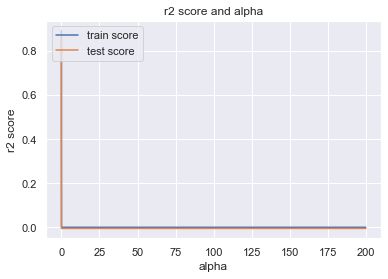

In [70]:
#plotting the values of r2 score to choose the optimal value of alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [71]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
params = {'alpha': [1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01,
                                   0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20, 50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [72]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.028993,0.007044,0.001602,0.000800,1e-15,{'alpha': 1e-15},-0.036349,-0.031919,-0.028521,-0.030027,-0.032235,-0.031815,0.002641,4,-0.028174,-0.028856,-0.029972,-0.029295,-0.028717,-0.029003,0.000602
1,0.018396,0.005316,0.001804,0.000402,1e-10,{'alpha': 1e-10},-0.036349,-0.031919,-0.028521,-0.030027,-0.032235,-0.031815,0.002641,3,-0.028174,-0.028856,-0.029972,-0.029295,-0.028717,-0.029003,0.000602
2,0.022997,0.005795,0.002202,0.000984,1e-08,{'alpha': 1e-08},-0.036349,-0.031919,-0.028520,-0.030027,-0.032235,-0.031814,0.002640,2,-0.028174,-0.028856,-0.029972,-0.029295,-0.028717,-0.029003,0.000602
3,0.008000,0.001547,0.002001,0.000002,0.0001,{'alpha': 0.0001},-0.033158,-0.031992,-0.028293,-0.029251,-0.031978,-0.030936,0.001842,1,-0.029028,-0.028938,-0.030166,-0.029365,-0.028836,-0.029267,0.000484
4,0.005799,0.000751,0.001996,0.000003,0.001,{'alpha': 0.001},-0.034607,-0.033892,-0.031118,-0.029819,-0.034166,-0.032722,0.001898,5,-0.031965,-0.031501,-0.032700,-0.031625,-0.031607,-0.031880,0.000439


In [73]:
model_cv.best_params_

{'alpha': 0.0001}

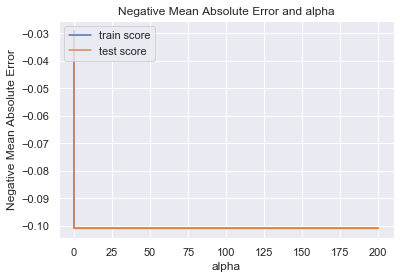

In [74]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [75]:
# model with optimal alpha = 0.001
lm = Lasso(alpha=0.001)
lm.fit(X_train_rfe, y_train)


# predict
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8655419532790927
0.8623449376719995


In [76]:
# lasso model parameters with alpha = 0.001
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
final_var=dict(zip(cols, model_parameters))
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'house_age': -0.163,
 'KitchenAbvGr': -0.008,
 'LowQualFinSF': -0.0,
 '2ndFlrSF': -0.0,
 'garage_age': -0.0,
 'FullBath': 0.0,
 'TotalBsmtSF': 0.0,
 'BedroomAbvGr': -0.0,
 'TotRmsAbvGrd': 0.0,
 'YearBuilt': 0.0,
 'PoolArea': -0.0,
 'Street': 0.0,
 'PoolQC': -0.0,
 'Alley': 0.0,
 'GarageYrBlt': 0.0,
 'Utilities': -0.0,
 'OverallCond': 0.018,
 'BsmtFullBath': 0.022,
 'BsmtFinSF1': 0.032,
 'constant': 0.054,
 '1stFlrSF': 0.056,
 'GarageCars': 0.065,
 'LotArea': 0.085,
 'TotalSF': 0.161,
 'OverallQual': 0.206,
 'GrLivArea': 0.252}

With optimal value of alpha=0.001 we got r2 values for training and test data as 0.88 and 0.86 which is good indication that model is not overfit

## **Ridge regression**

In [77]:
# ridge regression without tuning hyper parameter
lm = Ridge(alpha=1000)
lm.fit(X_train_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.2126787737018594
0.2052671235643011


In [78]:
# Now let's do k fold with r2 score and tune hyper parameter
params = {'alpha': [1e-15, 1e-10, 1e-8, 0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished
C:\Users\kumadeve\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1.0, 5.0,
                                   10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [79]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005802,0.000400,0.001802,0.000405,1e-15,{'alpha': 1e-15},0.406338,0.821287,0.855254,0.901965,0.897326,0.776071,0.187652,6,0.899977,0.898790,0.894043,0.883374,0.883383,0.891913,0.007246
1,0.007598,0.002873,0.002402,0.000490,1e-10,{'alpha': 1e-10},0.406338,0.820847,0.855254,0.901965,0.897326,0.775983,0.187631,8,0.899977,0.898790,0.894043,0.883374,0.883383,0.891913,0.007246
2,0.006417,0.001644,0.002384,0.001330,1e-08,{'alpha': 1e-08},0.406338,0.820847,0.855254,0.901965,0.897326,0.775984,0.187631,7,0.899977,0.898790,0.894043,0.883374,0.883383,0.891913,0.007246
3,0.008000,0.007017,0.001600,0.000491,0.001,{'alpha': 0.001},0.420929,0.820856,0.855238,0.901986,0.897362,0.778923,0.181868,5,0.899973,0.898789,0.894043,0.883374,0.883383,0.891912,0.007245
4,0.006015,0.002124,0.001984,0.000633,0.01,{'alpha': 0.01},0.526929,0.820925,0.855104,0.902169,0.897670,0.800291,0.140206,4,0.899651,0.898788,0.894041,0.883370,0.883378,0.891845,0.007176


In [80]:
model_cv.best_params_

{'alpha': 1.0}

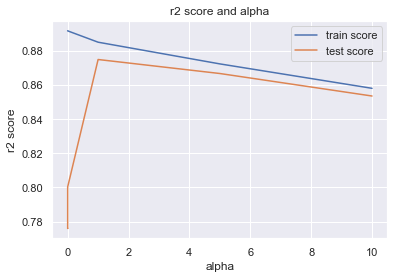

In [81]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [82]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
params = {'alpha': [1e-15, 1e-10, 1e-8, 0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1.0, 5.0,
                                   10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [83]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005801,0.002227,0.001998,0.000635,1e-15,{'alpha': 1e-15},-0.034271,-0.032005,-0.031314,-0.028379,-0.031038,-0.031404,0.001892,4,-0.028811,-0.028567,-0.028799,-0.029762,-0.029333,-0.029055,0.000434
1,0.005799,0.001923,0.002987,0.001095,1e-10,{'alpha': 1e-10},-0.034271,-0.032014,-0.031314,-0.028379,-0.031038,-0.031406,0.001892,6,-0.028811,-0.028567,-0.028799,-0.029762,-0.029333,-0.029055,0.000434
2,0.005600,0.002058,0.002000,0.000633,1e-08,{'alpha': 1e-08},-0.034271,-0.032014,-0.031314,-0.028379,-0.031038,-0.031406,0.001892,5,-0.028811,-0.028567,-0.028799,-0.029762,-0.029333,-0.029055,0.000434
3,0.003399,0.001021,0.000800,0.000400,0.001,{'alpha': 0.001},-0.034182,-0.032015,-0.031317,-0.028376,-0.031034,-0.031387,0.001867,3,-0.028819,-0.028567,-0.028799,-0.029762,-0.029331,-0.029055,0.000433
4,0.004199,0.000401,0.002002,0.000632,0.01,{'alpha': 0.01},-0.033486,-0.032024,-0.031342,-0.028347,-0.030994,-0.031241,0.001680,2,-0.028880,-0.028561,-0.028793,-0.029754,-0.029312,-0.029060,0.000424


In [84]:
model_cv.best_params_

{'alpha': 1.0}

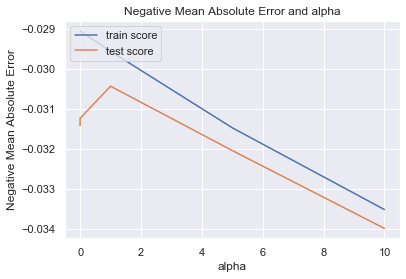

In [85]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [86]:
# model with optimal alpha = 1.0
# ridge regression
lm = Ridge(alpha=1.0)
lm.fit(X_train_rfe, y_train)
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_rfe)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8847169865168188
0.8643825431943529


Builing the Ridge regression after variable shrinkage done by lasso

In [87]:
# # Only the variables with non zero coefficient values are selected

# {'house_age': -0.163,
#  'KitchenAbvGr': -0.008,
#  'LowQualFinSF': -0.0,
#  '2ndFlrSF': -0.0,
#  'garage_age': -0.0,
#  'FullBath': 0.0,
#  'TotalBsmtSF': 0.0,
#  'BedroomAbvGr': -0.0,
#  'TotRmsAbvGrd': 0.0,
#  'YearBuilt': 0.0,
#  'PoolArea': -0.0,
#  'Street': 0.0,
#  'PoolQC': -0.0,
#  'Alley': 0.0,
#  'GarageYrBlt': 0.0,
#  'Utilities': -0.0,
#  'OverallCond': 0.018,
#  'BsmtFullBath': 0.022,
#  'BsmtFinSF1': 0.032,
#  'constant': 0.054,
#  '1stFlrSF': 0.056,
#  'GarageCars': 0.065,
#  'LotArea': 0.085,
#  'TotalSF': 0.161,
#  'OverallQual': 0.206,
#  'GrLivArea': 0.252}

X_new=cols.drop(['LowQualFinSF','2ndFlrSF','garage_age','FullBath',
                 'TotalBsmtSF','YearBuilt','PoolArea','Street','PoolQC',
                 'Alley','GarageYrBlt','Utilities'])



In [88]:
#lets look at the length of the variables after elimination by lasso regression
len(X_new)

14

In [89]:
#lets move the varibles in to a list
reduced_cols=list(X_new)
# #removing the constant 
reduced_cols.remove('constant')

In [90]:
#creating the dataframe of the varibles extracted above
X_train_new = X_train_rfe[reduced_cols]
X_test_new = X_test_rfe[reduced_cols]

In [91]:
X_train_new.head()

,house_age,1stFlrSF,BedroomAbvGr,BsmtFinSF1,KitchenAbvGr,GarageCars,TotRmsAbvGrd,GrLivArea,TotalSF,OverallCond,BsmtFullBath,LotArea,OverallQual
210,0.831316,0.332176,0.500000,0.711997,0.000000,0.000000,0.306762,0.265590,0.313360,5,0.5,0.267606,0.644443
318,0.358515,0.514631,0.732487,0.798248,0.000000,0.861353,0.693238,0.703568,0.613318,4,0.5,0.381833,0.813196
239,0.741673,0.300832,0.630930,0.527159,0.000000,0.430677,0.524414,0.478013,0.403398,3,0.0,0.356839,0.734867
986,0.887026,0.390236,0.500000,0.000000,0.000000,0.430677,0.306762,0.515145,0.386570,7,0.0,0.256789,0.734867
1416,0.964969,0.476619,0.732487,0.000000,0.584963,0.682606,0.831176,0.647007,0.518820,5,0.0,0.409094,0.537493


In [92]:
X_test_new.head()

,house_age,1stFlrSF,BedroomAbvGr,BsmtFinSF1,KitchenAbvGr,GarageCars,TotRmsAbvGrd,GrLivArea,TotalSF,OverallCond,BsmtFullBath,LotArea,OverallQual
1436,0.581005,0.332176,0.63093,0.743746,0.0,0.682606,0.306762,0.265590,0.313360,5,0.0,0.362701,0.537493
57,0.167041,0.330345,0.63093,0.000000,0.0,0.682606,0.524414,0.534979,0.456894,4,0.0,0.414422,0.813196
780,0.330078,0.478829,0.63093,0.000000,0.0,0.682606,0.423388,0.411014,0.444178,4,0.0,0.335896,0.813196
382,0.119013,0.365012,0.63093,0.000000,0.0,0.682606,0.613525,0.552119,0.477919,4,0.0,0.368092,0.813196
1170,0.531952,0.433848,0.63093,0.724612,0.0,0.430677,0.423388,0.366410,0.402106,5,0.5,0.381427,0.734867


In [93]:
# list of alphas to tune
params = {'alpha': [1e-15, 1e-10, 1e-8, 0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1.0, 5.0,
                                   10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [94]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011800,0.003969,0.003401,0.002334,1e-15,{'alpha': 1e-15},0.905323,0.822798,0.846928,0.895790,0.901802,0.874558,0.033410,5,0.872031,0.891973,0.886075,0.873914,0.871248,0.879048,0.008401
1,0.004802,0.001167,0.002400,0.000489,1e-10,{'alpha': 1e-10},0.905323,0.822798,0.846928,0.895790,0.901802,0.874558,0.033410,4,0.872031,0.891973,0.886075,0.873914,0.871248,0.879048,0.008401
2,0.005401,0.001020,0.002600,0.000490,1e-08,{'alpha': 1e-08},0.905323,0.822798,0.846928,0.895790,0.901802,0.874558,0.033410,3,0.872031,0.891973,0.886075,0.873914,0.871248,0.879048,0.008401
3,0.007999,0.003523,0.002201,0.000749,0.001,{'alpha': 0.001},0.905322,0.822798,0.846935,0.895792,0.901800,0.874560,0.033409,2,0.872031,0.891973,0.886075,0.873914,0.871248,0.879048,0.008401
4,0.009586,0.004313,0.003199,0.001940,0.01,{'alpha': 0.01},0.905307,0.822798,0.846999,0.895809,0.901783,0.874569,0.033395,1,0.872031,0.891973,0.886075,0.873914,0.871248,0.879048,0.008401


In [95]:
model_cv.best_params_

{'alpha': 0.01}

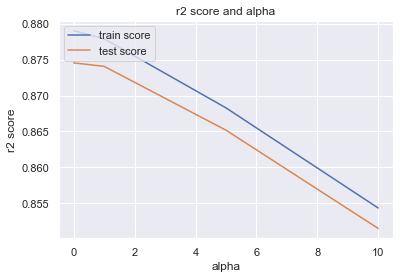

In [96]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [97]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
params = {'alpha': [1e-15, 1e-10, 1e-8, 0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1.0, 5.0,
                                   10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [98]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005799,0.000988,0.002400,0.000493,1e-15,{'alpha': 1e-15},-0.027353,-0.031482,-0.032357,-0.029129,-0.030771,-0.030216,0.001783,1,-0.030341,-0.029470,-0.029080,-0.030002,-0.029489,-0.029676,0.000443
1,0.004593,0.001856,0.001798,0.000400,1e-10,{'alpha': 1e-10},-0.027353,-0.031482,-0.032357,-0.029129,-0.030771,-0.030216,0.001783,2,-0.030341,-0.029470,-0.029080,-0.030002,-0.029489,-0.029676,0.000443
2,0.004599,0.001744,0.002198,0.000980,1e-08,{'alpha': 1e-08},-0.027353,-0.031482,-0.032357,-0.029129,-0.030771,-0.030216,0.001783,3,-0.030341,-0.029470,-0.029080,-0.030002,-0.029489,-0.029676,0.000443
3,0.003002,0.000897,0.001204,0.000396,0.001,{'alpha': 0.001},-0.027354,-0.031483,-0.032356,-0.029129,-0.030771,-0.030216,0.001783,4,-0.030341,-0.029470,-0.029079,-0.030002,-0.029489,-0.029676,0.000443
4,0.004202,0.000983,0.001400,0.000488,0.01,{'alpha': 0.01},-0.027359,-0.031486,-0.032350,-0.029128,-0.030774,-0.030216,0.001781,5,-0.030342,-0.029471,-0.029079,-0.030004,-0.029492,-0.029678,0.000443


In [99]:
model_cv.best_params_

{'alpha': 1e-15}

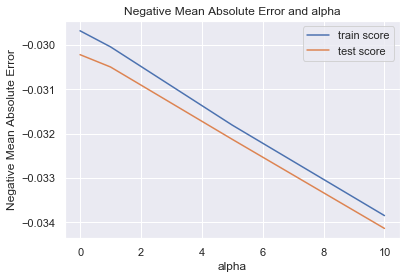

In [100]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [104]:
# model with optimal alpha = 1
lm = Ridge(alpha=1e-15)
lm.fit(X_train_new, y_train)

# predict
y_train_pred = lm.predict(X_train_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.878619267087255
0.8726066025169498


In [102]:
#lets create a dictionary with coeffiecients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
final_var=dict(zip(cols, model_parameters))

In [103]:
#sort the dict
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'MSSubClass': -0.16,
 'Street': -0.067,
 'LotFrontage': -0.05,
 'LotConfig': 0.019,
 'constant': 0.023,
 'LandSlope': 0.028,
 'LotArea': 0.031,
 'LotShape': 0.045,
 'Alley': 0.062,
 'MSZoning': 0.08,
 'Neighborhood': 0.14,
 'Utilities': 0.159,
 'Condition1': 0.221,
 'LandContour': 0.248}

## **Conclusion**

## *These are the top features in the ridge regression after using the non zero coefficient variables from the lasso regression.*

***'MSSubClass','Street','LotFrontage','LotConfig','constant','LandSlope','LotArea','LotShape','Alley','MSZoning','Neighborhood','Utilities','Condition1',
'LandContour'***

With optimal value of `alpha = 1e-15` for ridge regression on variables selected by lasso regession, we got following score for train and test data set.<br> R2 for train : `0.878619267087255` <br>R2 for test : `0.8726066025169498`

This score looks good and we can conclude that model is not overfitting. And this score is pretty close to previous ridge regression model.

Optimal value of alpha of lasso regression is `0.001` and r2 score for optimal value of alpha is given below 
<br>R2 score for train : `0.8655419532790927`
<br>R2 score for test  : `0.8623449376719995`

Optimal value of alpha of ridge regression is `1.0` and r2 score for optimal value of alpha is given below 
<br>R2 score for train : `0.8847169865168188`
<br>R2 score for test : `0.8643825431943529`